In [1]:
import tensorflow as tf 
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models 
import tensorflow.keras.optimizers as optim 


import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import random

import warnings 

warnings.filterwarnings("ignore")

train_images = []
test_images = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
 !unzip "/content/drive/MyDrive/archive (3).zip"

Archive:  /content/drive/MyDrive/archive (3).zip
replace cifar10-32/test/class0/img10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# for i in range()
# (train_images , _), (test_images , _) = "/content/128x128"

In [5]:
IMG = (64, 64, 3)

In [6]:
def ConvBlock(x, num, filter, alpha=0.1, kernel=3, moment=0.9):
  for i in range(num):
    x=layers.Conv2D(filter, kernel, padding="same" )(x)
    x=layers.BatchNormalization(momentum=moment)(x)
    x=layers.LeakyReLU(alpha)(x)
  return x

def operation(inp, num=6, filter=64, start_kernel=7, kernel=3, moment=0.9, alpha=0.1 , gf=2):
  x = ConvBlock(inp, 1, filter, alpha, kernel, moment)
  for _ in range(num):
      filter = filter*gf
      x = ConvBlock(x, num, filter)
  x = ConvBlock(x, 1, 3)
  return x

def Stegnography(inp1, inp2, num:list=[2,2,2], filter=64, start_kernel=7, kernel=3, moment=0.9, alpha=0.1, gf=2):
    inp1 = layers.Input(inp1)
    encoder = operation(inp1, num[0], filter, start_kernel, kernel, moment, alpha, gf)
    inp2 = layers.Input(inp2)
    x = layers.Concatenate()([inp2, encoder])
    intermediate = operation(x, num[1], filter, start_kernel, kernel, moment, alpha, gf)
    decoder =  operation(intermediate, num[2], filter, start_kernel, kernel, moment, alpha, gf)

    model = models.Model(inputs=[inp1, inp2], outputs=[intermediate, decoder], name="ma_chuda")
    return model

model = Stegnography(IMG,IMG)
model.summary() 





  

Model: "ma_chuda"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 64, 64, 64)   0           ['batch_normalization[0][0

In [7]:
train_images = r"/content/cifar10-64/train/"
test_images = r"/content/cifar10-64/test/"

In [8]:
import os
folders = os.listdir(test_images)
VAL = []
for folder in folders:
  VALID = []
  files = os.listdir(test_images+folder)
  for file in files[:400]:
    VALID.append(cv2.imread(test_images+folder+"/"+file)/255.0)
  VAL.append(VALID)

In [9]:
import os
folders = os.listdir(train_images)
IMGS = []
for folder in folders:
  IMAGE = []
  files = os.listdir(train_images+folder)
  for file in files[:2000]:
    IMAGE.append(cv2.imread(train_images+folder+"/"+file)/255.0)
  IMGS.append(IMAGE)

In [10]:
import random

In [11]:
IMGS = np.array(IMGS)
VAL = np.array(VAL)

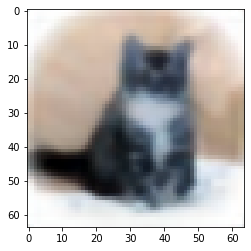

In [12]:
plt.imshow(IMGS[0][0])

In [13]:
XIMG = []
XDUM = []
VIMG = []
VDUM = []

for _ in range(4000):
    folder1 = random.randint(0,9)
    folder2 = random.randint(0,9)
    imp = random.randint(0, 1800)
    dum = random.randint(0, 199)
    dumb = IMGS[folder1][imp]
    imp = IMGS[folder2][imp+dum]
  
    inpdum = dumb.reshape(IMG[0],IMG[1],IMG[2])
    inpsex = imp.reshape(IMG[0],IMG[1],IMG[2])
    XIMG.append(inpsex)
    XDUM.append(inpdum)

XDUM = np.array(XDUM)
XIMG = np.array(XIMG)

for _ in range(750):
    folder1 = random.randint(0, 9)
    folder2 = random.randint(0, 9)
    imp = random.randint(0, 300)
    dum = random.randint(0, 99)
    dumb = VAL[folder1][imp]
    imp = VAL[folder2][imp+dum]
    inputs = np.concatenate([dumb.reshape(IMG[0], IMG[1], IMG[2]), imp.reshape(IMG[0], IMG[1], IMG[2])], axis = 2)
    inpdum = dumb.reshape(IMG[0], IMG[1], IMG[2])
    inpsex = imp.reshape(IMG[0], IMG[1], IMG[2])
    VIMG.append(inpsex)
    VDUM.append(inpdum)

VDUM = np.array(VDUM)
VIMG = np.array(VIMG)


In [16]:
model.compile(loss="mae", optimizer=optim.Adam(learning_rate=1e-3), metrics=["accuracy"])
model.fit([XIMG, XDUM], [XDUM, XIMG], epochs=100, verbose=1, batch_size = 50, validation_data=[[VIMG, VDUM], [VDUM, VIMG]], validation_batch_size=50)

Epoch 1/100
80/80 [==============================] - 72s 768ms/step - loss: 0.2807 - leaky_re_lu_11_loss: 0.1294 - leaky_re_lu_17_loss: 0.1513 - leaky_re_lu_11_accuracy: 0.4794 - leaky_re_lu_17_accuracy: 0.3652 - val_loss: 0.2202 - val_leaky_re_lu_11_loss: 0.1081 - val_leaky_re_lu_17_loss: 0.1121 - val_leaky_re_lu_11_accuracy: 0.5442 - val_leaky_re_lu_17_accuracy: 0.3700
Epoch 2/100
80/80 [==============================] - 61s 763ms/step - loss: 0.2137 - leaky_re_lu_11_loss: 0.0988 - leaky_re_lu_17_loss: 0.1148 - leaky_re_lu_11_accuracy: 0.5595 - leaky_re_lu_17_accuracy: 0.3893 - val_loss: 0.1968 - val_leaky_re_lu_11_loss: 0.0928 - val_leaky_re_lu_17_loss: 0.1040 - val_leaky_re_lu_11_accuracy: 0.5743 - val_leaky_re_lu_17_accuracy: 0.3932
Epoch 3/100
55/80 [===================>..........] - ETA: 18s - loss: 0.1918 - leaky_re_lu_11_loss: 0.0868 - leaky_re_lu_17_loss: 0.1050 - leaky_re_lu_11_accuracy: 0.5797 - leaky_re_lu_17_accuracy: 0.3966

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'oitput secret')

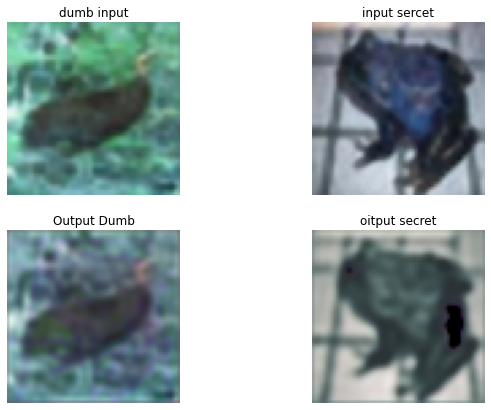

In [17]:
# code for displaying multiple images in one figure
c=200
#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(10, 7))
out1, out2 = model([VDUM[c].reshape(-1, IMG[0], IMG[1], IMG[2]), VIMG[c].reshape(-1, IMG[0], IMG[1], IMG[2])])
# setting values to rows and column variables
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(VIMG[c].reshape(IMG[0], IMG[1], IMG[2]))

plt.axis('off')
plt.title("dumb input")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(VDUM[c].reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("input sercet")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(np.array(out1).reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("Output Dumb")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(np.array(out2).reshape(IMG[0], IMG[1], IMG[2]))
plt.axis('off')
plt.title("oitput secret")


In [ ]:
model.save("/content/drive/MyDrive/ujjwal64x64.h5")